In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import Dependencies

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

In [3]:
all_data_dir = "brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/"

In [4]:
!dir brain-mri-images-for-brain-tumor-detection

 Volume in drive C has no label.
 Volume Serial Number is BC06-7F88

 Directory of c:\Users\aacas\OneDrive\Desktop\Aacash\Github Files\Brain Tumour Detection\brain-mri-images-for-brain-tumor-detection

07-08-2023  12:08    <DIR>          .
07-08-2023  12:26    <DIR>          ..
07-08-2023  12:08    <DIR>          brain_tumor_dataset
07-08-2023  12:08    <DIR>          no
07-08-2023  12:08    <DIR>          yes
               0 File(s)              0 bytes
               5 Dir(s)  703,441,268,736 bytes free


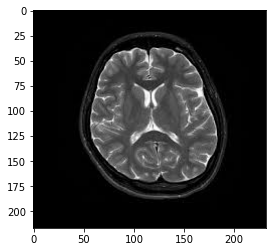

In [5]:
img = mpimg.imread("brain-mri-images-for-brain-tumor-detection/no/no 2.jpg")
plt.imshow(img)

In [6]:
img.shape

(217, 232, 3)

In [7]:
tf.random.set_seed(42)

In [8]:
generator = ImageDataGenerator(rescale = 1./255.,
                              validation_split=0.8,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              rotation_range=25)

In [9]:
train_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary", 
                                               seed=42)

test_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [10]:
train_data

In [55]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"), 
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

In [56]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check accuracy
    if(logs.get('val_accuracy') > 0.98):
        if (logs.get('accuracy') > 0.98):
          print("\nAccuracy is greater than 0.98 so cancelling training!")
          self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [57]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [58]:
model_history = model.fit(train_data, 
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        callbacks=[callbacks])

Epoch 1/50
8/8 [==============================] - 5s 610ms/step - loss: 0.7002 - accuracy: 0.5652 - val_loss: 0.6219 - val_accuracy: 0.6957
Epoch 2/50
8/8 [==============================] - 4s 571ms/step - loss: 0.5839 - accuracy: 0.7273 - val_loss: 0.6016 - val_accuracy: 0.7549
Epoch 3/50
8/8 [==============================] - 5s 582ms/step - loss: 0.5540 - accuracy: 0.7589 - val_loss: 0.5687 - val_accuracy: 0.7312
Epoch 4/50
8/8 [==============================] - 5s 594ms/step - loss: 0.5400 - accuracy: 0.7589 - val_loss: 0.4852 - val_accuracy: 0.7826
Epoch 5/50
8/8 [==============================] - 5s 609ms/step - loss: 0.4888 - accuracy: 0.7905 - val_loss: 0.4775 - val_accuracy: 0.7866
Epoch 6/50
8/8 [==============================] - 5s 639ms/step - loss: 0.5414 - accuracy: 0.7628 - val_loss: 0.5039 - val_accuracy: 0.7589
Epoch 7/50
8/8 [==============================] - 6s 755ms/step - loss: 0.4952 - accuracy: 0.7984 - val_loss: 0.5217 - val_accuracy: 0.8142
Epoch 8/50
8/8 [====

In [59]:
model.evaluate(test_data)

8/8 [==============================] - 2s 232ms/step - loss: 0.0566 - accuracy: 0.9802


[0.05663537234067917, 0.9802371263504028]

<AxesSubplot:>

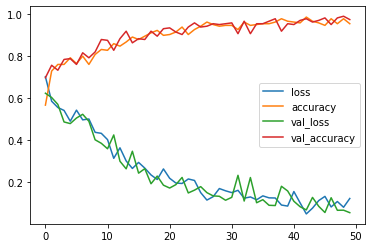

In [60]:
pd.DataFrame(model_history.history).plot()

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 32)      18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 32)      9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 106, 106, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 89888)            